In [3]:
import xarray as xr
import matplotlib.pyplot as plt
from utility import analysis_parameters as ap
from utility import util
import cartopy.crs as ccrs
import numpy as np
import netCDF4 as nc
import dask
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

var="cltotal"
model="ICON"
topdown=True # False for NICAM and SAM; all else True

chunk_dict = {"time":80,"lat":71, "lon":71, "Xdim":1000, "ncol":1000}
diff=False
lev=0

In [4]:
ds = xr.open_dataset(ap.get_file(model, "TWP_3D", var), chunks=chunk_dict)[var]
if model=="GEOS" or model=="SCREAM" or model=="ICON":
    z = xr.open_dataset(ap.get_file(model, "TWP_3D", "zg"), chunks=chunk_dict).zg
    print(z[:,0].values)
elif model=="SAM":
    z = ds.z
    print(z[0].values)
elif model=="NICAM":
    z = ds.lev
    print(z[0].values)
if model=="GEOS":
    ds = ds[::3]
    z = z[::3]
    print(z[0].values)
    print(ds.time.values[0], z[0].time.values)
print(ds.shape, z.shape)
ds

[########################################] | 100% Completed |  0.4s
[[45120.61  45120.63  45120.637 ... 45120.203 45120.18  45120.15 ]
 [45121.227 45121.125 45121.293 ... 45120.38  45120.52  45120.44 ]
 [45120.42  45120.35  45120.477 ... 45120.613 45120.7   45120.75 ]
 ...
 [45120.957 45120.906 45120.938 ... 45120.984 45121.113 45121.17 ]
 [45120.598 45120.48  45120.723 ... 45122.188 45122.49  45122.547]
 [45122.24  45122.184 45122.23  ... 45120.664 45120.617 45120.6  ]]
(210, 77, 195442) (210, 76, 195442)


<xarray.DataArray 'cltotal' (time: 210, height: 77, cell: 195442)>
dask.array<open_dataset-247a05a734dcf423abf5296eee2bb08acltotal, shape=(210, 77, 195442), dtype=float32, chunksize=(80, 77, 195442), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-30T03:00:00 ... 2020-02-28T21:00:00
    clon     (cell) float64 dask.array<chunksize=(195442,), meta=np.ndarray>
    clat     (cell) float64 dask.array<chunksize=(195442,), meta=np.ndarray>
  * height   (height) float64 14.0 15.0 16.0 17.0 18.0 ... 87.0 88.0 89.0 90.0
Dimensions without coordinates: cell
Attributes:
    standard_name:  mass_fraction_of_cloud_ice_in_air
    long_name:      Specific cloud ice content (diagnostic) 
    units:          kg kg-1
    param:          213.1.0
    CDI_grid_type:  unstructured
    origin:         QI_DIA

In [5]:
thres=1e-5

#initialize arrays to zeros
cldtop = np.zeros(ds[:,0].shape)
cldtopind = np.zeros(ds[:,0].shape)

if model=="SAM":
    for l in range(1,len(ds.z)):
        print(-l, z[-l])
        cldtop = np.where((cldtop==0)&(ds.isel(z=-l)>thres), z[-l], cldtop)
        cldtopind = np.where((cldtopind==0)&(ds.isel(z=-l)>thres), -l, cldtopind)
elif model=="ICON":
    for l in range(18,len(ds.height)-1):
        print(l)
        cldtop = np.where((cldtop==0)&(ds.isel(height=l)>thres), z[:,l], cldtop)
        cldtopind = np.where((cldtopind==0)&(ds.isel(height=l)>thres), l, cldtopind)
elif model=="SCREAM":
    for l in range(0,len(ds.lev)-1):
        print(l, z[0,l,0].values)
        cldtop = np.where((cldtop==0)&(ds.isel(lev=l)>thres), z[:,l], cldtop)
        cldtopind = np.where((cldtopind==0)&(ds.isel(lev=l)>thres), l, cldtopind)
elif model=="GEOS":
    for l in range(75,len(ds.lev)-1):
        print(l, z[0,l,0].values)
        cldtop = np.where((cldtop==0)&(ds.isel(lev=l)>thres), z[:,l], cldtop)
        cldtopind = np.where((cldtopind==0)&(ds.isel(lev=l)>thres), l, cldtopind)
elif model=="NICAM": #NICAM
    for l in range(1,len(ds.lev)-1):
        print(-l, z[0,-l,0].values)
        cldtop = np.where((cldtop==0)&(ds.isel(lev=-l)>thres), z[:,-l], cldtop)
        cldtopind = np.where((cldtopind==0)&(ds.isel(lev=-l)>thres), -l, cldtopind)
else:
    raise Exception("model not defined")

18
[########################################] | 100% Completed |  6.5s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  9.6s
19
[########################################] | 100% Completed |  9.8s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  9.9s
20
[########################################] | 100% Completed |  7.4s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed | 11.1s
21
[########################################] | 100% Completed | 10.3s
[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed | 10.8s
22
[########################################] | 100% Completed | 10.9s
[########################################] | 100% Completed |  0.4s
[################################

In [7]:
cldtop, thres

(array([[   0.        ,    0.        ,    0.        , ..., 2035.40075684,
         2035.3425293 , 2035.29406738],
        [   0.        ,    0.        ,    0.        , ...,    0.        ,
            0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,    0.        ,
            0.        ,    0.        ],
        ...,
        [   0.        ,    0.        ,    0.        , ...,    0.        ,
            0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,    0.        ,
            0.        ,    0.        ],
        [ 792.17462158,  792.19085693,  792.18988037, ...,    0.        ,
            0.        ,    0.        ]]),
 1e-05)

In [8]:
if model=="GEOS":
    da = xr.DataArray(cldtop, dims=["time","Xdim"], coords={"time":ds.time,"Xdim":ds.Xdim}, 
                  attrs={"name":"cloud top height","units":"m","thres":thres})
    daind = xr.DataArray(cldtopind, dims=["time","Xdim"], coords={"time":ds.time,"Xdim":ds.Xdim}, 
                     attrs={"name":"cloud top height index","units":"index","thres":thres})
elif model=="SCREAM":
    da = xr.DataArray(cldtop, dims=["time","ncol"], coords={"time":ds.time,"ncol":ds.ncol}, 
                  attrs={"name":"cloud top height","units":"m","thres":thres})
    daind = xr.DataArray(cldtopind, dims=["time","ncol"], coords={"time":ds.time,"ncol":ds.ncol}, 
                     attrs={"name":"cloud top height index","units":"index","thres":thres})
elif model=="ICON":
    da = xr.DataArray(cldtop, dims=["time","cell"], coords={"time":ds.time,"cell":ds.cell}, 
                  attrs={"name":"cloud top height","units":"m","thres":thres})
    daind = xr.DataArray(cldtopind, dims=["time","cell"], coords={"time":ds.time,"cell":ds.cell}, 
                     attrs={"name":"cloud top height index","units":"index","thres":thres})
else:
    da = xr.DataArray(cldtop, dims=["time","lat","lon"], coords={"time":ds.time,"lat":ds.lat,"lon":ds.lon}, 
                  attrs={"name":"cloud top height","units":"m","thres":thres})
    daind = xr.DataArray(cldtopind, dims=["time","lat","lon"], coords={"time":ds.time,"lat":ds.lat,"lon":ds.lon}, 
                     attrs={"name":"cloud top height index","units":"index","thres":thres})


In [9]:
model

'ICON'

In [10]:
file = "/work/bb1153/b380883/TWP/TWP_{}_cldtop_height_20200130-20200228.nc".format(model)
# ds = xr.Dataset({"cldtop_height{:.0e}".format(thres):da, "cldtop_ind{:.0e}".format(thres):daind},
#                 attrs={"name":"cloud top height", "deets":"calculated in cloudtop.ipynb"})
ds = xr.open_dataset(file)
ds = ds.assign({"cldtop_height{:.0e}".format(thres):da, "cldtop_ind{:.0e}".format(thres):daind})
ds

<xarray.Dataset>
Dimensions:             (time: 210, cell: 195442)
Coordinates:
  * time                (time) datetime64[ns] 2020-01-30T03:00:00 ... 2020-02...
  * cell                (cell) int64 0 1 2 3 4 ... 195438 195439 195440 195441
Data variables:
    cldtop_height1e-07  (time, cell) float64 ...
    cldtop_ind1e-07     (time, cell) float64 ...
    cldtop_height1e-06  (time, cell) float64 ...
    cldtop_ind1e-06     (time, cell) float64 ...
    cldtop_height1e-05  (time, cell) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    cldtop_ind1e-05     (time, cell) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    name:     cloud top height
    deets:    calculated in cloudtop.ipynb

In [11]:
# ! rm /work/bb1153/b380883/TWP/TWP_ICON_cldtop_height_20200130-20200228.nc
ds.to_netcdf(file)



# plotting

In [3]:
model="GEOS"

In [4]:
file = "/work/bb1153/b380883/TWP/TWP_{}_cldtop_height_20200130-20200228.nc".format(model)
ds = xr.open_dataset(file, chunks=chunk_dict)
ds

<xarray.Dataset>
Dimensions:             (time: 720, Xdim: 97152)
Coordinates:
  * time                (time) datetime64[ns] 2020-01-30 ... 2020-02-28T23:00:00
  * Xdim                (Xdim) int64 0 1 2 3 4 ... 97147 97148 97149 97150 97151
Data variables:
    cldtop_height1e-06  (time, Xdim) float64 dask.array<chunksize=(80, 1000), meta=np.ndarray>
    cldtop_ind1e-06     (time, Xdim) float64 dask.array<chunksize=(80, 1000), meta=np.ndarray>
    cldtop_height1e-05  (time, Xdim) float64 dask.array<chunksize=(80, 1000), meta=np.ndarray>
Attributes:
    name:     cloud top height
    deets:    calculated in cloudtop.ipynb

(array([4.09999447e-04, 1.98026702e-05, 1.34182172e-06, 1.10428754e-06,
        3.09471943e-05, 6.10210936e-05, 2.11620776e-05, 1.41800086e-05,
        2.13602351e-05, 2.51807463e-05, 3.48164272e-05, 5.28573856e-05,
        7.24182739e-05, 7.43001120e-05, 6.98365764e-05, 4.89465247e-05,
        2.60849649e-05, 4.81767050e-06, 2.42971294e-07, 5.26720987e-09]),
 array([    0.        ,  1009.66679688,  2019.33359375,  3029.00039063,
         4038.6671875 ,  5048.33398438,  6058.00078125,  7067.66757813,
         8077.334375  ,  9087.00117188, 10096.66796875, 11106.33476563,
        12116.0015625 , 13125.66835938, 14135.33515625, 15145.00195312,
        16154.66875   , 17164.33554688, 18174.00234375, 19183.66914062,
        20193.3359375 ]),
 <BarContainer object of 20 artists>)

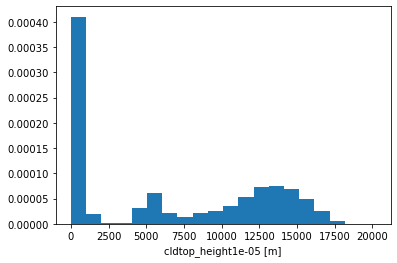

In [10]:
ds["cldtop_height1e-05"].plot.hist(bins=20, density=1)

In [9]:
cldtop_low = ds["cldtop_height1e-06"][:-1]
cldtop_med = ds["cldtop_height1e-05"][:-1]
cldtop_hgh = ds["cldtop_height1e-04"][:-1]
cldtop_xlw = ds["cldtop_height1e-07"][:-1]

In [10]:
cldtop_hgh.time[0:2], cldtop_hgh.shape

(<xarray.DataArray 'time' (time: 2)>
 array(['2020-01-30T00:00:00.000000000', '2020-01-30T03:00:00.000000000'],
       dtype='datetime64[ns]')
 Coordinates:
   * time     (time) datetime64[ns] 2020-01-30 2020-01-30T03:00:00
 Attributes:
     standard_name:  time
     long_name:      time
     axis:           T,
 (239, 97152))

In [11]:
olr = xr.open_dataset(ap.get_file(model,"TWP","rlut"), chunks=chunk_dict).rlut[::12,:][:-1]
olr

<xarray.DataArray 'rlut' (time: 239, Xdim: 97152)>
dask.array<getitem, shape=(239, 97152), dtype=float32, chunksize=(7, 1000), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-30 ... 2020-02-28T18:00:00
    lons     (Xdim) float32 dask.array<chunksize=(1000,), meta=np.ndarray>
    lats     (Xdim) float32 dask.array<chunksize=(1000,), meta=np.ndarray>
Dimensions without coordinates: Xdim
Attributes:
    standard_name:  toa_outgoing_longwave_flux
    long_name:      upwelling_longwave_flux_at_toa
    units:          W m-2
    CDI_grid_type:  unstructured
    origin:         OLR

In [12]:
olr.time[0].values, cldtop_hgh.time[0].values

(numpy.datetime64('2020-01-30T00:00:00.000000000'),
 numpy.datetime64('2020-01-30T00:00:00.000000000'))

[########################################] | 100% Completed |  2.9s
23219328
[########################################] | 100% Completed |  2.9s
23219328
[########################################] | 100% Completed |  2.8s
23219328
[########################################] | 100% Completed |  2.8s
23219328


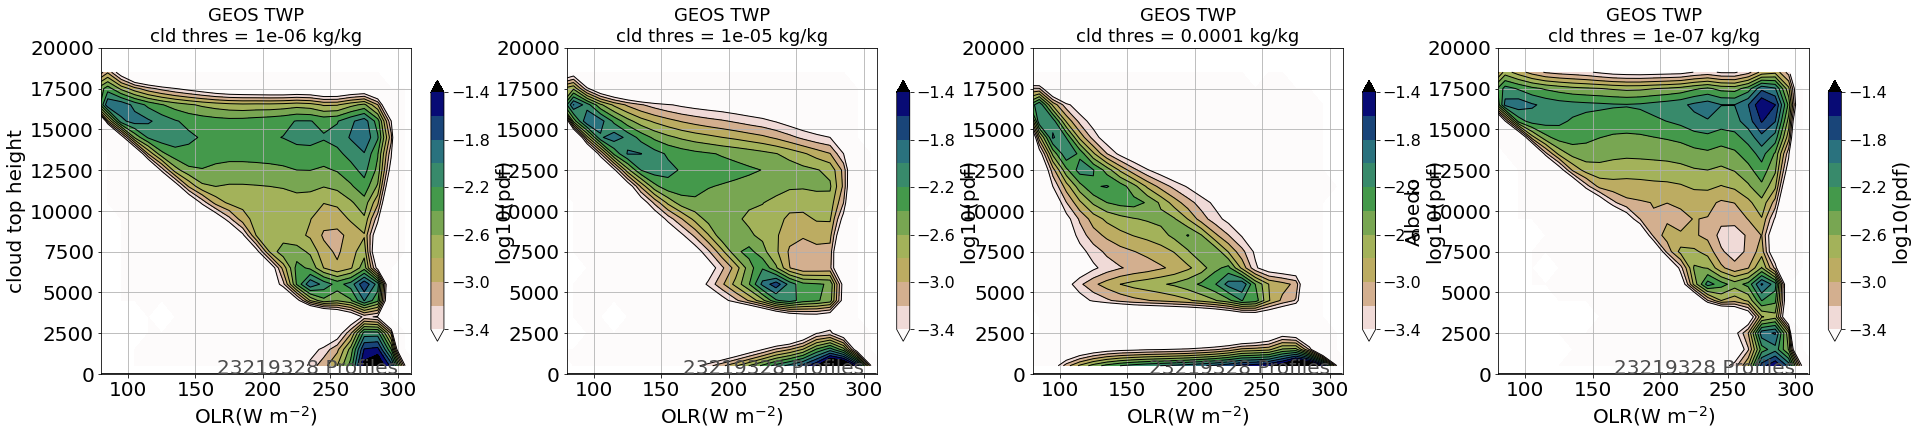

In [15]:
region="TWP"

# fig, ax = plt.subplots(1,3, figsize=(24,6))
fig, ax = plt.subplots(1,4, figsize=(24/3*4,6))
util.dennisplot("density",olr.values.flatten(), cldtop_low.values.flatten(), 
                ax=ax[0], model=model, region=region,
                cmap="gist_earth_r", levels=np.arange(-3.4,-1.2,0.2), 
                ybins=np.arange(0,20000,1000), colorbar_on=True)
ax[0].set_ylim([0,20000])
ax[0].set_title("{} TWP\ncld thres = {} kg/kg".format(model, 1e-6), fontsize=18)
util.dennisplot("density",olr.values.flatten(), cldtop_med.values.flatten(), 
                ax=ax[1], model=model, region=region,
                cmap="gist_earth_r", levels=np.arange(-3.4,-1.2,0.2), 
                ybins=np.arange(0,20000,1000), colorbar_on=True)
ax[1].set_ylim([0,20000])
ax[1].set_title("{} TWP\ncld thres = {} kg/kg".format(model, 1e-5), fontsize=18)
util.dennisplot("density",olr.values.flatten(), cldtop_hgh.values.flatten(), 
                ax=ax[2], model=model, region=region,
                cmap="gist_earth_r", levels=np.arange(-3.4,-1.2,0.2), 
                ybins=np.arange(0,20000,1000), colorbar_on=True)
ax[2].set_ylim([0,20000])
ax[2].set_title("{} TWP\ncld thres = {} kg/kg".format(model, 1e-4), fontsize=18)

util.dennisplot("density",olr.values.flatten(), cldtop_xlw.values.flatten(), 
                ax=ax[3], model=model, region=region,
                cmap="gist_earth_r", levels=np.arange(-3.4,-1.2,0.2), 
                ybins=np.arange(0,20000,1000), colorbar_on=True)
ax[3].set_ylim([0,20000])
ax[3].set_title("{} TWP\ncld thres = {} kg/kg".format(model, 1e-7), fontsize=18)


ax[0].set_ylabel("cloud top height")
ax[1].set_ylabel("")
ax[2].set_ylabel("")

plt.savefig("../plots/TWP/cldtop_v_olr_{}.png".format(model),dpi=120)
plt.show()

In [13]:
for i in [cldtop_low, cldtop_med, cldtop_hgh]:
    print((i.where(i==0).count()/i.count()).values)


[########################################] | 100% Completed |  0.7s
0.17746782865855631
[########################################] | 100% Completed |  0.8s
0.3018176683413582
[########################################] | 100% Completed |  0.7s
0.6133990503810179


In [26]:
cldtop_high.shape

(239, 284, 284)